In [11]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar semilla para reproducibilidad
np.random.seed(42)

# Generar fechas para un año
fechas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Generar datos simulados
datos = {
    'ventas': np.random.randint(1, 100, size=len(fechas)),  # Ventas aleatorias entre 1 y 100
    'precio': np.random.uniform(10, 1000, size=len(fechas)),  # Precios entre 10 y 1000
    'cantidad': np.random.normal(50, 10, size=len(fechas)),  # Cantidad con distribución normal
    'categoria': np.random.choice(['Electrónicos', 'Ropa', 'Alimentos', 'Hogar'], size=len(fechas)),
    'region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], size=len(fechas))
}

# Crear DataFrame
df = pd.DataFrame(datos, index=fechas)

In [12]:
# Ver las primeras filas
print("Primeras 5 filas:")
print(df.head())

# Información general del DataFrame
print("\nInformación del DataFrame:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Valores únicos en columnas categóricas
print("\nCategorías únicas:")
print(df['categoria'].value_counts())
print("\nRegiones únicas:")
print(df['region'].value_counts())

Primeras 5 filas:
            ventas      precio   cantidad     categoria region
2024-01-01      52  954.389291  50.574740          Ropa   Este
2024-01-02      93  915.715746  27.171975  Electrónicos  Oeste
2024-01-03      15  376.457113  48.980505  Electrónicos  Norte
2024-01-04      72   25.302050  50.421341  Electrónicos  Norte
2024-01-05      61  929.035377  55.145890     Alimentos  Oeste

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2024-01-01 to 2024-12-31
Freq: D
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ventas     366 non-null    int32  
 1   precio     366 non-null    float64
 2   cantidad   366 non-null    float64
 3   categoria  366 non-null    object 
 4   region     366 non-null    object 
dtypes: float64(2), int32(1), object(2)
memory usage: 15.7+ KB
None

Estadísticas descriptivas:
           ventas      precio    cantidad
count  366.000000  366.0000

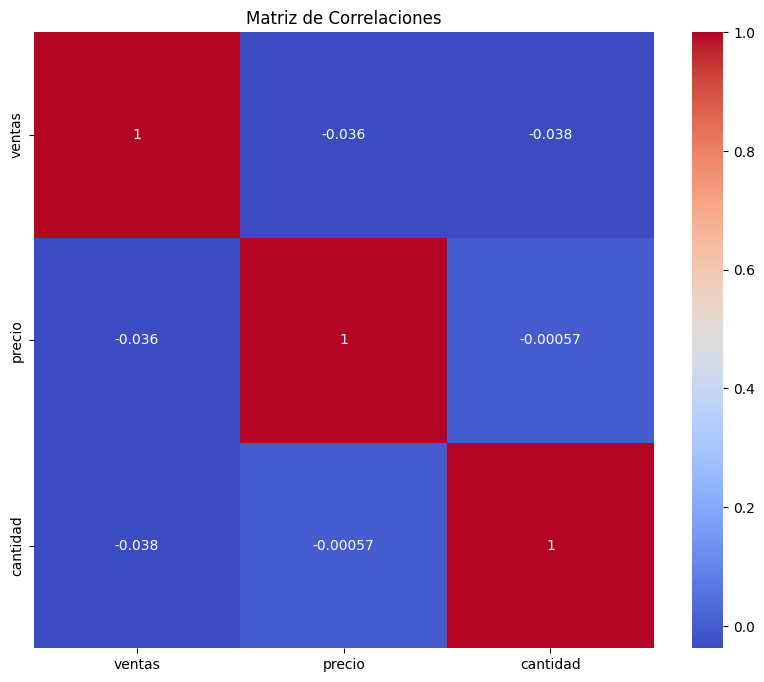

In [13]:
# Calcular correlaciones
correlaciones = df[['ventas', 'precio', 'cantidad']].corr()

# Visualizar correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()

In [14]:
# Agrupar por categoría y calcular estadísticas
grupo_categoria = df.groupby('categoria').agg({
    'ventas': ['sum', 'mean', 'std'],
    'precio': ['mean', 'min', 'max'],
    'cantidad': ['mean', 'sum']
})

print("\nAnálisis por categoría:")
print(grupo_categoria)

# Agrupar por región y categoría
grupo_region_categoria = df.groupby(['region', 'categoria'])['ventas'].sum().unstack()
print("\nVentas por región y categoría:")
print(grupo_region_categoria)


Análisis por categoría:
             ventas                            precio                         \
                sum       mean        std        mean        min         max   
categoria                                                                      
Alimentos      4531  50.344444  29.609124  537.309819  20.729275  990.153312   
Electrónicos   5071  52.822917  29.837100  495.587925  24.249554  996.670469   
Hogar          4224  45.419355  27.499535  505.214123  21.240108  999.720497   
Ropa           4189  48.149425  30.914559  528.413324  36.103305  986.773183   

               cantidad               
                   mean          sum  
categoria                             
Alimentos     49.774137  4479.672352  
Electrónicos  48.549264  4660.729346  
Hogar         50.738814  4718.709746  
Ropa          47.898392  4167.160109  

Ventas por región y categoría:
categoria  Alimentos  Electrónicos  Hogar  Ropa
region                                         
Este         

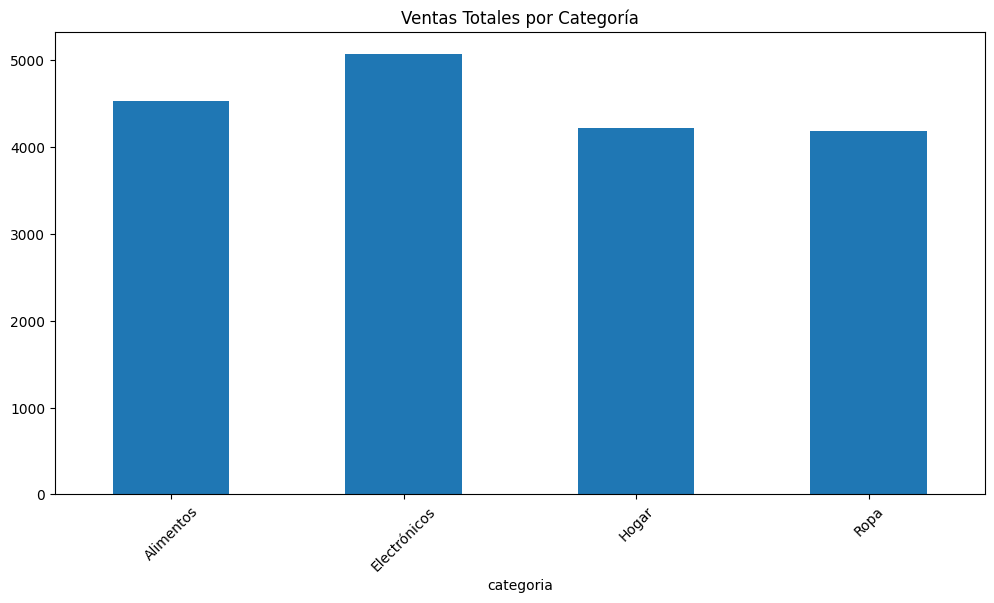

C:\Users\julia\AppData\Local\Temp\ipykernel_3932\3302523030.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['ventas'].resample('M').mean().plot()


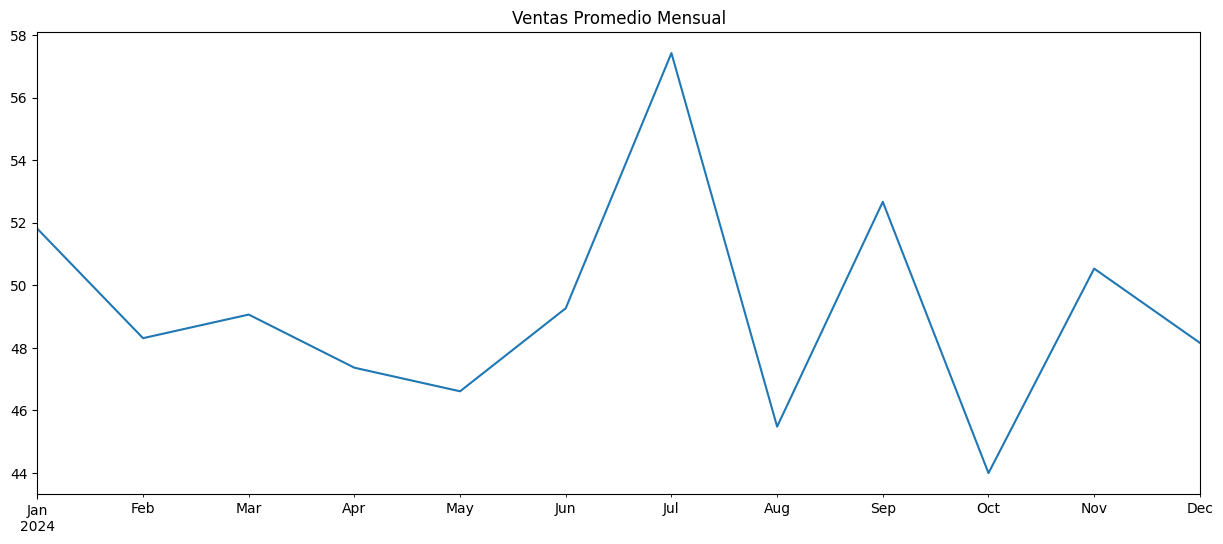

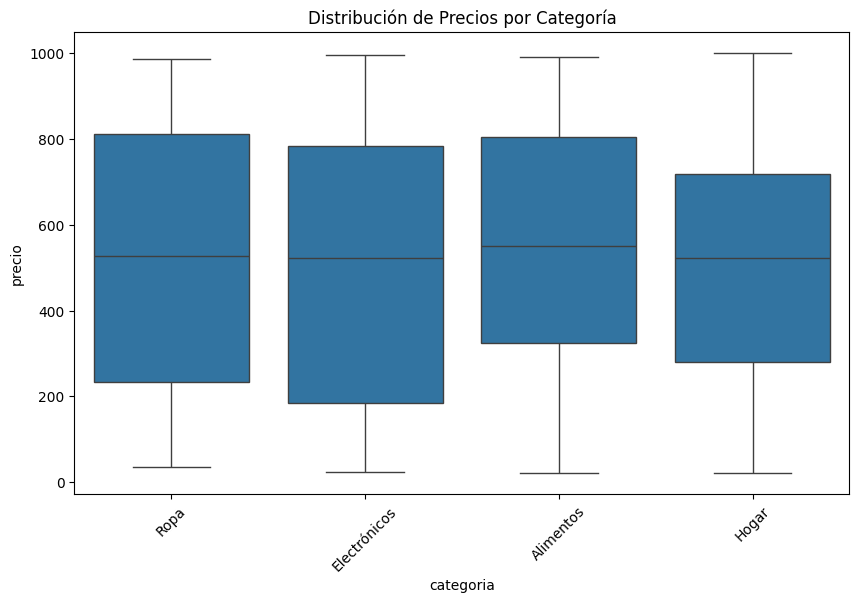

In [15]:
# Gráfico de barras de ventas por categoría
plt.figure(figsize=(12, 6))
df.groupby('categoria')['ventas'].sum().plot(kind='bar')
plt.title('Ventas Totales por Categoría')
plt.xticks(rotation=45)
plt.show()

# Gráfico de líneas de ventas a lo largo del tiempo
plt.figure(figsize=(15, 6))
df['ventas'].resample('M').mean().plot()
plt.title('Ventas Promedio Mensual')
plt.show()

# Boxplot de precios por categoría
plt.figure(figsize=(10, 6))
sns.boxplot(x='categoria', y='precio', data=df)
plt.title('Distribución de Precios por Categoría')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Identificar outliers en ventas
Q1 = df['ventas'].quantile(0.25)
Q3 = df['ventas'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['ventas'] < (Q1 - 1.5 * IQR)) | (df['ventas'] > (Q3 + 1.5 * IQR))]
print("\nOutliers en ventas:")
print(outliers)


Outliers en ventas:
Empty DataFrame
Columns: [ventas, precio, cantidad, categoria, region]
Index: []


C:\Users\julia\AppData\Local\Temp\ipykernel_3932\3904673029.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['ventas'].resample('M').mean().plot(ax=axes[1,1])


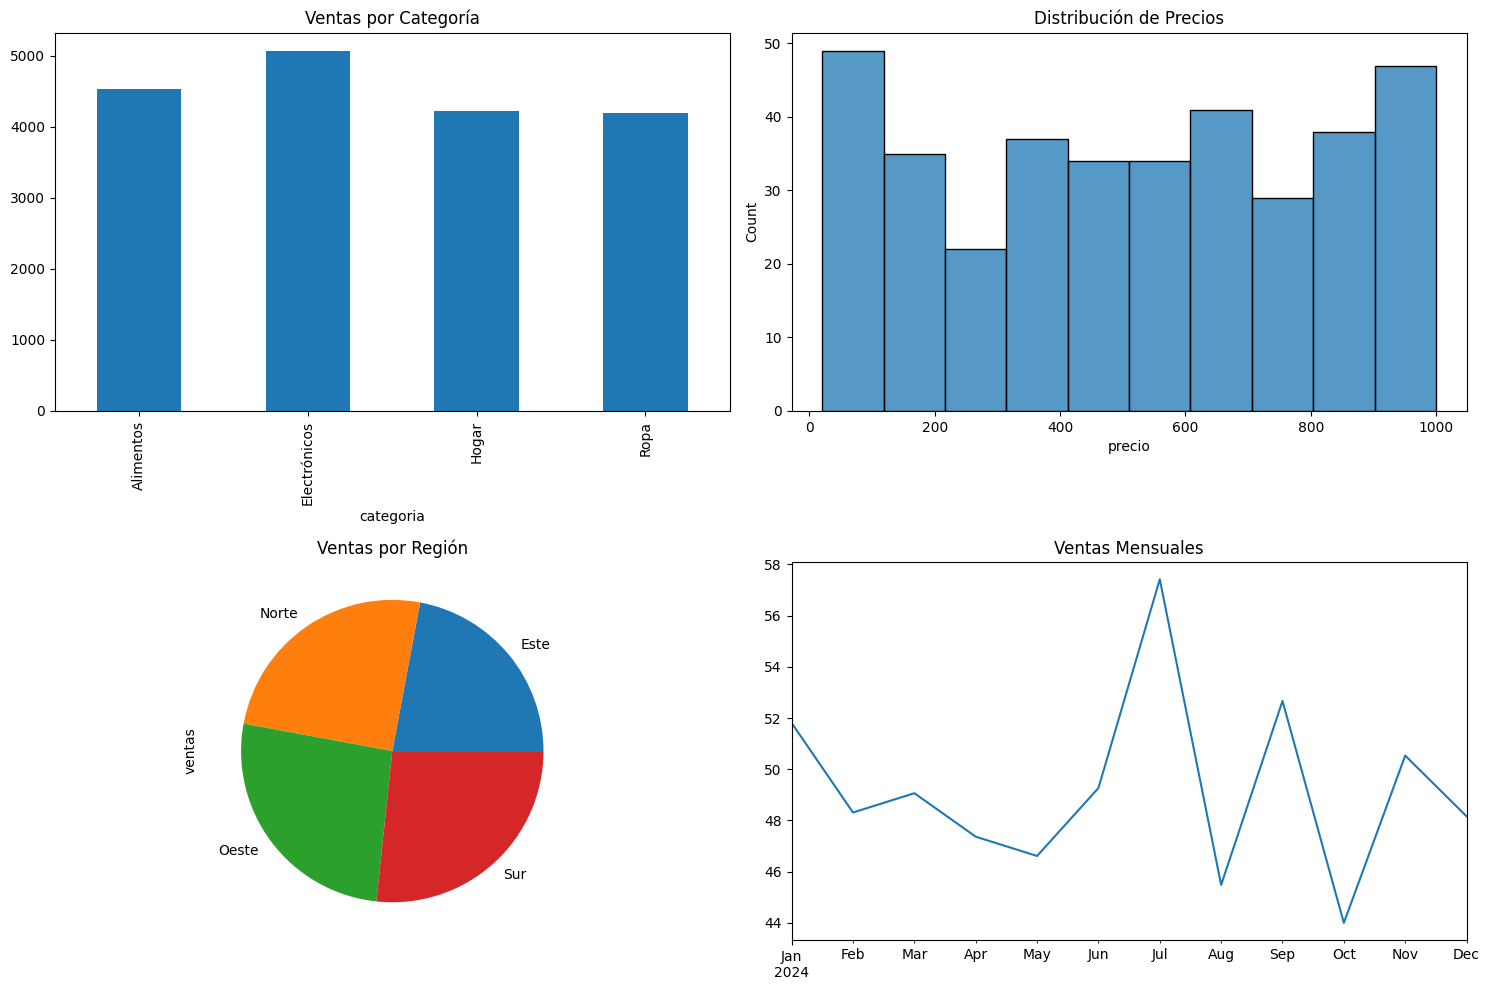

In [17]:
# Crear una figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Ventas por categoría
df.groupby('categoria')['ventas'].sum().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Ventas por Categoría')

# Gráfico 2: Distribución de precios
sns.histplot(data=df, x='precio', ax=axes[0,1])
axes[0,1].set_title('Distribución de Precios')

# Gráfico 3: Ventas por región
df.groupby('region')['ventas'].sum().plot(kind='pie', ax=axes[1,0])
axes[1,0].set_title('Ventas por Región')

# Gráfico 4: Serie temporal de ventas
df['ventas'].resample('M').mean().plot(ax=axes[1,1])
axes[1,1].set_title('Ventas Mensuales')

plt.tight_layout()
plt.show()